In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
%matplotlib inline


#import data to a pandas dataframe
data = pd.read_csv(r'/home/angelos/Desktop/nadiasthesis/solar_data.csv')


#add colums to our dataframe
data['kt'] = data['GHIobs']/ data['TOA']
data['h']= np.radians(90 - data['sza'])
data['m']= (np.sin(data['h']) + 0.15 * (np.degrees(data['h']) + 3.885)**(-1.253))**(-1)
data['kt_1']= data['kt']/(1.031 * np.exp(-1.4/(0.9+ 9.4/data['m'])) + 0.1)


#divide dataframe according to weather conditions (ανοιχτό διάστημα προς τα αριστερά)
clear = data[data['kt_1'].between(0.65,10,inclusive='right')]
intermediate = data[data['kt_1'].between(0.30,0.65,inclusive='right')]
cloudy = data[data['kt_1'].between(0.00,0.30,inclusive='right')]

#print(clear['kt_1'].head(50))
print(intermediate.head(15))


               timestamp     GHIobs  GHIraw      TOA      sza        kt  \
0   2019-01-01T06:58:00Z  64.056280  39.696  250.560  79.7477  0.255652   
1   2019-01-01T06:59:00Z  64.580127  42.480  254.166  79.5986  0.254086   
2   2019-01-01T07:00:00Z  65.055307  45.342  257.760  79.4499  0.252387   
3   2019-01-01T07:01:00Z  65.915272  48.276  261.336  79.3017  0.252224   
4   2019-01-01T07:02:00Z  66.664090  51.288  264.906  79.1538  0.251652   
5   2019-01-01T07:03:00Z  67.317486  54.366  268.464  79.0063  0.250751   
6   2019-01-01T07:04:00Z  67.353696  57.522  272.010  78.8593  0.247615   
7   2019-01-01T07:05:00Z  67.012178  60.750  275.544  78.7127  0.243200   
8   2019-01-01T07:06:00Z  66.939873  64.050  279.066  78.5664  0.239871   
9   2019-01-01T07:07:00Z  67.025492  67.416  282.576  78.4206  0.237195   
10  2019-01-01T07:08:00Z  66.758749  70.860  286.074  78.2752  0.233362   
11  2019-01-01T07:09:00Z  66.544183  74.376  289.566  78.1302  0.229807   
12  2019-01-01T07:10:00Z 

for clear weather conditions
*slope (a) is: [[0.98148241]]
*intercept(b) is [2.86769278]
the MBE for the clear conditions is: -5.691368313023689
the RMSE for the clear conditions is: 48.89818975231034


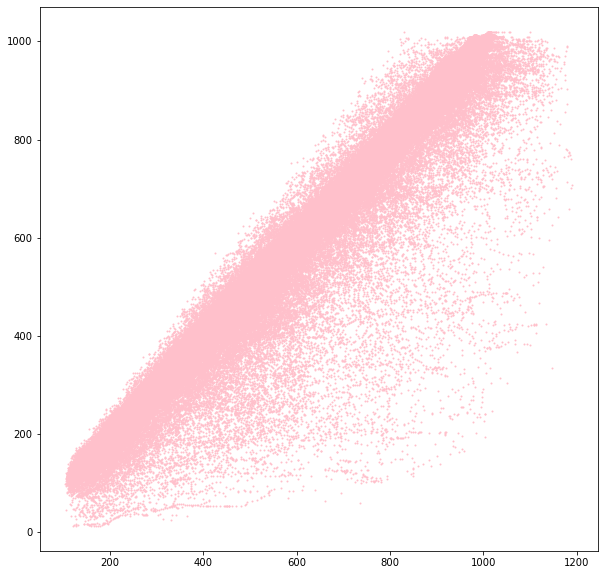

In [37]:
#plotting clear weather conditions and calculating slope and intercept
y1=clear['GHIraw']
x1=clear['GHIobs']
plt.figure(figsize=(10,10))
plt.plot(x1,y1,'ro',color='pink',markersize=1) 

model1 = LinearRegression().fit(x1.values.reshape(-1,1), y1.values.reshape((-1, 1)))

print('for clear weather conditions')
print('*slope (a) is:', model1.coef_)
print("*intercept(b) is",model1.intercept_)


#calculating MBE and RMSE
data['clr']= clear['GHIraw'] - clear['GHIobs'] 
sum_clr = data['clr'].sum()
n = len(data['clr'].index)
MBEclr= sum_clr / n
print("the MBE for the clear conditions is:",MBEclr)
data['clr2'] = (clear['GHIraw'] - clear['GHIobs'])**2
sum_clr2 = data['clr2'].sum()
RMSEclr = (sum_clr2/n)**0.5
print("the RMSE for the clear conditions is:",RMSEclr)

for intermediate weather conditions
*slope (a) is: [[1.14972483]]
*intercept(b) is [28.24778304]
the MBE for the intermediate conditions is: 10.419590634533211
the RMSE for the intermediate conditions is: 56.62689786017935


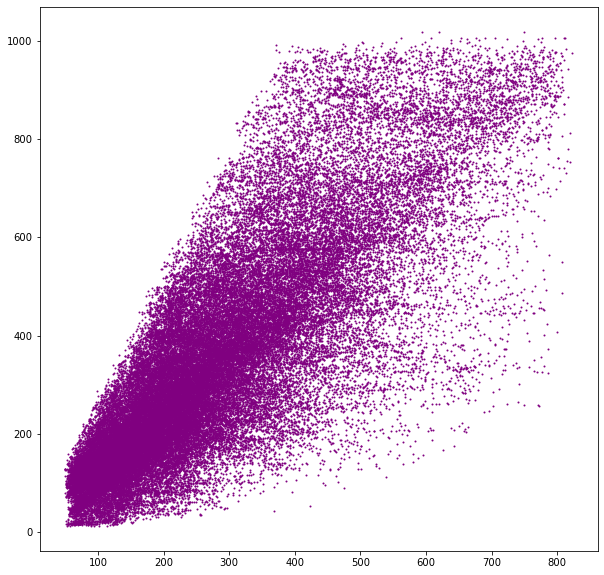

In [38]:
#plotting intermediate weather conditions and calculating slope and intercept
y2=intermediate['GHIraw']
x2=intermediate['GHIobs']
plt.figure(figsize=(10,10))
plt.plot(x2,y2,'ro',color='purple',markersize=1) 
#plt.scatter(x,y, color='pink'),#clear.plot('GHIraw','GHIobs')

model2 = LinearRegression().fit(x2.values.reshape(-1,1), y2.values.reshape((-1, 1)))

print('for intermediate weather conditions')
print('*slope (a) is:', model2.coef_)
print("*intercept(b) is",model2.intercept_)


#calculating MBE and RMSE
data['int']= intermediate['GHIraw'] - intermediate['GHIobs'] 
sum_int = data['int'].sum()
n = len(data['int'].index)
MBEi= sum_int / n
print("the MBE for the intermediate conditions is:",MBEi)
data['int2'] = (intermediate['GHIraw'] - intermediate['GHIobs'])**2
sum_int2 = data['int2'].sum()
RMSEi = (sum_int2/n)**0.5
print("the RMSE for the intermediate conditions is:",RMSEi)

for cloudy weather conditions
*slope (a) is: [[1.58052854]]
*intercept(b) is [33.75665189]
the MBE for the cloudy conditions is: 10.666448554292954
the RMSE for the cloudy conditions is: 55.20423858551945


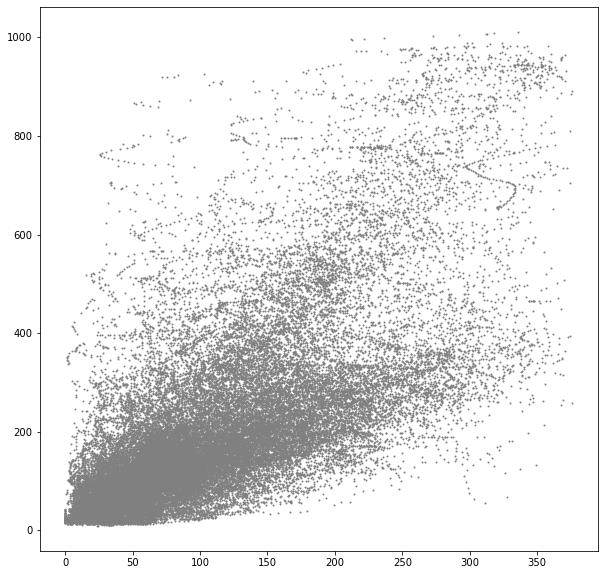

In [39]:
#plotting cloudy weather conditions and calculating slope and intercept
y3=cloudy['GHIraw']
x3=cloudy['GHIobs']

plt.figure(figsize=(10,10))
plt.plot(x3,y3,'ro',color='grey',markersize=1)

model3 = LinearRegression().fit(x3.values.reshape(-1,1), y3.values.reshape((-1, 1)))

print('for cloudy weather conditions')
print('*slope (a) is:', model3.coef_)
print("*intercept(b) is",model3.intercept_)


#calculating MBE and RMSE
data['cld']=  cloudy['GHIraw'] -cloudy['GHIobs'] 
sum_cld = data['cld'].sum()
n = len(data['cld'].index)
MBEcld= sum_cld / n
print("the MBE for the cloudy conditions is:",MBEcld)
data['cld2'] = (cloudy['GHIraw'] - cloudy['GHIobs'])**2
sum_cld2 = data['cld2'].sum()
RMSEcld = (sum_cld2/n)**0.5
print("the RMSE for the cloudy conditions is:",RMSEcld)

In [ ]:
#is the kt_1 index okay for the cloudy conditions?
print(cloudy[['timestamp','GHIobs','GHIraw','kt','kt_1']].head(20))

In [ ]:
#μέθοδος πρώτη: γραμμική μέθοδος
# GHImod = aGHIobs + β : already calculated above (GHImod=GHIraw)
# GHImod,cor = GHImod - [(a-1)GHIobs +b]

GHIcorclr = clear['GHIraw'] - ((model1.coef_-1)*clear['GHIobs'] +  model1.intercept_)
GHIcorint = intermediate['GHIraw'] - ((model2.coef_-1)*intermediate['GHIobs'] +  model2.intercept_)
GHIcorcld = cloudy['GHIraw'] - ((model3.coef_-1)*cloudy['GHIobs'] +  model3.intercept_)

#this doesnt work λογω του πολλαπλασιασμου στις παρενθέσεις